In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Pareto_distribution

https://en.wikipedia.org/wiki/Pareto_distribution

In [8]:
# Зададим распределенную по Парето случайную величину и укажем параметр распределения::
pareto_rv = sts.pareto(b=3, scale=1)

# Сгенерируем 1000 значений:
rvs = pareto_rv.rvs(size=1000)
print type(rvs)

<type 'numpy.ndarray'>


### Строим гистограмму:

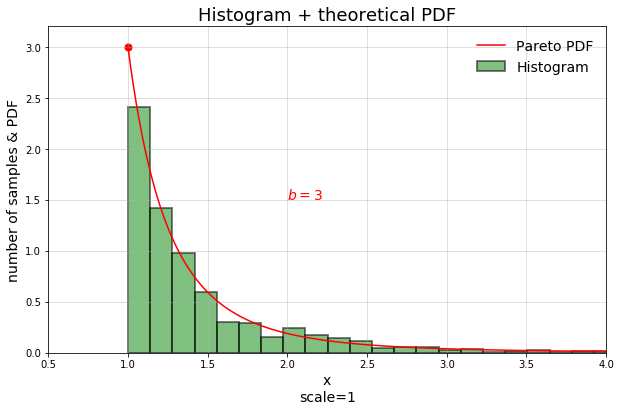

In [9]:
# Создаем экземпляр Figure(рисунок):
fig1 = plt.figure(figsize=(10, 6))   # указываем его размер

# Создаем область рисования:
ax = fig1.add_subplot(111)

# Задаём диапозон по осям области рисования:
ax.axis([0.5, 4, 0, 3.2])

# Подписываем рисунок:
ax.set_title('Histogram + theoretical PDF', fontsize=18)

# Подписываем значение scale, которое оставили по умолчанию и ось y:
plt.xlabel('x\nscale=1', fontsize=14)
plt.ylabel('number of samples & PDF', fontsize=14)

# Строим гистограмму, увеличиваем для наглядности число bins:
ax.hist(rvs, bins=100, normed=True, facecolor='green', linewidth=2., edgecolor='k', label = 'Histogram', alpha= .5)

# Рисуем поверх неё теоретическую плотность распределения нашей случайной величины:
ax.plot(sorted(rvs), pareto_rv.pdf(sorted(rvs)), color='r', linewidth=1.5, label = 'Pareto PDF')
ax.scatter(1, 3, color='r', linewidth=2.)

# Отображаем легенду:
ax.legend(loc='best', fontsize=14, frameon=False)

# Подписываем значение параметра b на области рисования:
ax.text(2., 1.5, r'$b = 3$', color='red', fontsize=14)

# Наносим сетку:
ax.grid(True, alpha = .5)

# Показать график:
plt.show()

# Закрыть текущий рисунок(figure):
plt.close()

In [14]:
def pareto_means(size, rep=1000, alpha=3, xm=1):
    '''
    Возвращает список выборочных средних.
    '''
    means = []
    for i in range(rep):
        pareto_rv = sts.pareto(b=alpha, scale=xm)
        rvs = pareto_rv.rvs(size)
        means.append(rvs.mean())
    return means

Формула теоретического математического ожидания:

$\mu = \frac{b * scale}{b-1}$ , где b=3, scale=1 (В Wiki b = $\alpha$,  scale = $x_m.$)

$  \Longrightarrow \mu = 1.5$

Стандартная ошибка среднего вычисляется по формуле:

$SD = \frac{\sigma}{\sqrt{n}}$ , где $\sigma = \sqrt{D[X]}$ - среднеквадратическое отклонение, $n$ - объём выборки.

Дисперсия:

$D[X] = \frac{scale^2 * b}{(b - 1)^2 * (b-2)} = \frac{1^2 * 3}{(3 - 1)^2 * (3-2)} = \frac{3}{4} = 0.75$

Рассчитаем СКО среднего для разных значений n:

In [15]:
from fractions import Fraction # в общем случае для точности представления дроби

n_values = [10, 50, 100]
sigma = []

for size in n_values:
    sigma.append(Fraction(3,4)/size**0.5)

sigma

[0.23717082451262847, 0.10606601717798213, 0.075]

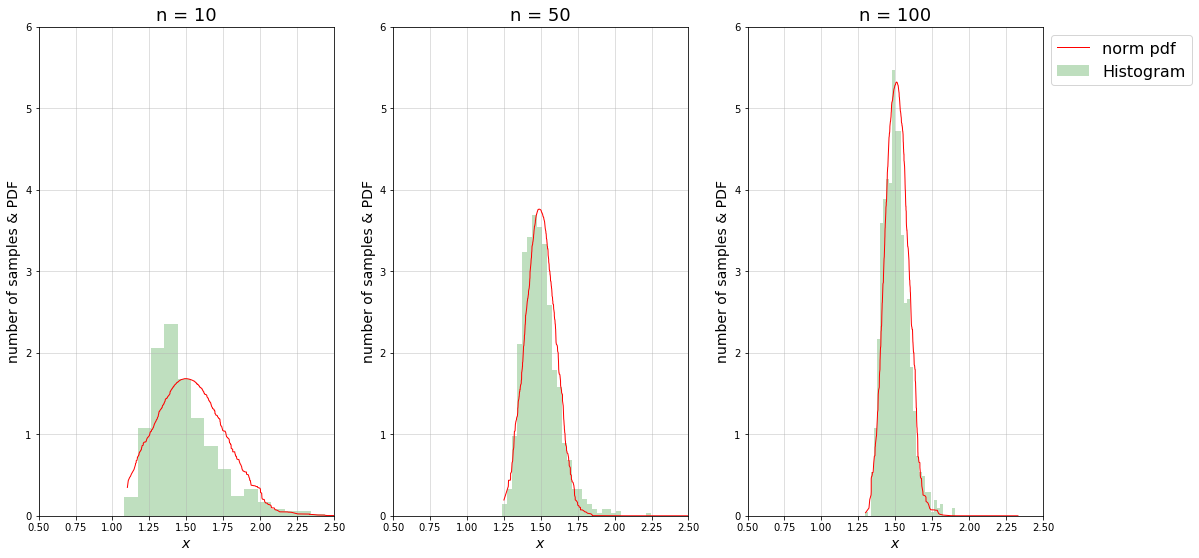

In [46]:
# Метод возвращает объект типа figure и массив из созданных subplots.(размер указан для figure)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 9))

# Общие для всех графиков настройки указываем в цикле:
for ax in fig.axes:
    ax.axis([.5, 2.5, 0, 6])    # Диапазон по осям.
    ax.grid(True, alpha = .5)   # Сетка со значением прозрачности.
    ax.set_xlabel(r'$x$', color = 'k', fontsize = 14) # Метка по оси x в формате TeX + цвет + размер шрифта
    ax.set_ylabel('number of samples & PDF', color = 'k', fontsize = 14) # Метка по оси y 

# Строим гистограммы и плотности нормального распределения средних:
for ax, size, std in (zip(range(len(fig.axes)), n_values, sigma)):
    
    fig.axes[ax].hist(
            pareto_means(size = size), bins=30,
            normed=True, facecolor='green', 
            label = 'Histogram', alpha= .25
            )
   
    fig.axes[ax].plot(
            sorted(pareto_means(size = size)), 
            sts.norm.pdf(sorted(pareto_means(size = size)), loc=1.5, scale=std),
            'r', lw=1., label='norm pdf'
            )
    # Подписываем графики:
    fig.axes[ax].set_title('n = %d' % size, fontsize=18, color='k')

# Выводим общую легеннду:
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=16)

# Показать график:
plt.show()

# Закрыть текущий рисунок(figure):
plt.close()

### Вывод:

С ростом $n$ точность нормальной аппроксимации увеличивается.